In [2]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.utils import shuffle

In [3]:
column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv('iris.csv', names = column_names)
label_encoder = preprocessing.LabelEncoder()
dataset['class'] = label_encoder.fit_transform(dataset['class'])
dataset = shuffle(dataset)

dataset.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
55,5.7,2.8,4.5,1.3,1
133,6.3,2.8,5.1,1.5,2
34,4.9,3.1,1.5,0.1,0
69,5.6,2.5,3.9,1.1,1
85,6.0,3.4,4.5,1.6,1
130,7.4,2.8,6.1,1.9,2
128,6.4,2.8,5.6,2.1,2
59,5.2,2.7,3.9,1.4,1
39,5.1,3.4,1.5,0.2,0
84,5.4,3.0,4.5,1.5,1


In [4]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width       class
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    1.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


In [5]:
print(dataset.groupby('class').size())

class
0    50
1    50
2    50
dtype: int64


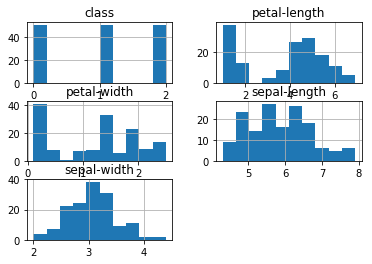

In [6]:
dataset.hist()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  if __name__ == '__main__':


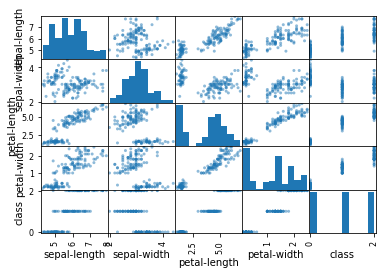

In [7]:
scatter_matrix(dataset)
plt.show()

In [8]:
X = dataset.values[:, 0:4]
Y = dataset['class'].as_matrix()

In [9]:
train_size = 100
X_train = X[:train_size]
Y_train = Y[:train_size]
print(X_train.shape)
print(Y_train.shape)
X_test = X[train_size:]
Y_test = Y[train_size:]
print(X_test.shape)
print(Y_test.shape)

(100, 4)
(100,)
(50, 4)
(50,)


In [10]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print('Accuracy of model')
    print(name, accuracy_score(predictions, Y_test))

Accuracy of model
LR 0.94
Accuracy of model
LDA 0.98
Accuracy of model
KNN 0.96
Accuracy of model
CART 0.96
Accuracy of model
NB 1.0
Accuracy of model
SVM 0.98
